In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/dadosspam.csv')

In [ ]:
df.head()

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [4]:
x = df.drop('spam', axis=1)
y = df['spam']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report

In [9]:
model = SVC(kernel='linear')   

In [10]:
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred = model.predict(x_test)
y_pred

In [14]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Acurácia: {acc:.5f}')
print(f'Precisão: {prec:.5f}')
print(f'F1-Score: {f1:.5f}')

Acurácia: 0.98667
Precisão: 1.00000
F1-Score: 0.98658


In [15]:
cm  = confusion_matrix(y_test, y_pred)
cm

array([[149,   0],
       [  4, 147]])

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Previsão')

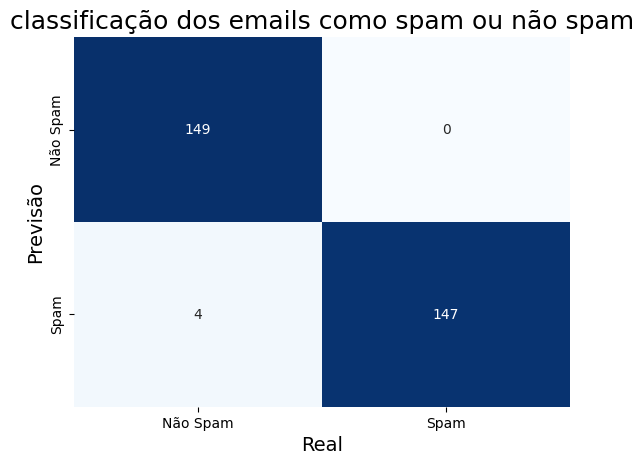

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False,xticklabels=['Não Spam', 'Spam'], yticklabels=['Não Spam', 'Spam'])
plt.title('classificação dos emails como spam ou não spam', fontsize=18)
plt.xlabel('Real', fontsize=14)
plt.ylabel('Previsão', fontsize =14)  

In [19]:
# Realizando a contagem das predições
spam_count = sum(y_pred)
non_spam_count = len(y_pred) - spam_count
print(f'Spam:{spam_count}')
print(f'Não Spam: {non_spam_count}')

Spam:147
Não Spam: 153


C:\Users\dsadm\AppData\Local\Temp\ipykernel_98524\504320702.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Não Spam','Spam'],y=[non_spam_count,spam_count],palette=cor,legend=False)


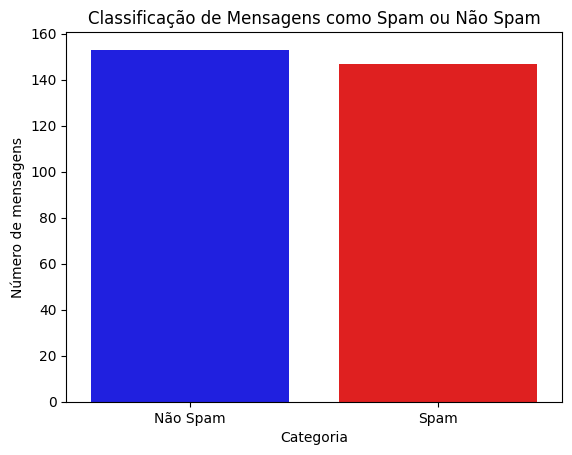

In [20]:
# Gráfico de barras
plt.Figure(figsize=(8,6))
cor = ['blue','red']
sns.barplot(x=['Não Spam','Spam'],y=[non_spam_count,spam_count],palette=cor,legend=False) 
# palete cor do heatmap
plt.xlabel('Categoria')
plt.ylabel('Número de mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.grid(False)